                                                        6ta Escuela Uniandina de Detectores de Partículas-2023.
                                                                    Universidad de los Andes
                                                                        Depto de Física

                                                    Taller Hands-On #1: Particle Physics Simulation - MG/PYTHIA/DELPHES.
                                                        Autores: Gustavo Ardila MSc, Andrés Florez PhD, Carlos Ávila PhD.
                                                        
                                                                            02/10/2023




Qué son MadGraph, Pythia y Delphes?


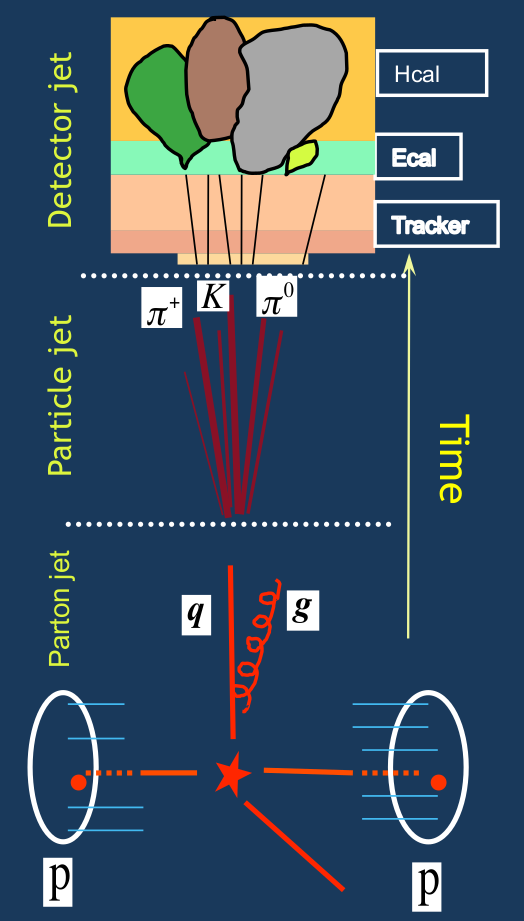

Lo primero que tenemos que hacer para empezar a trabajar con estas herramientas es tener instaladas las herramientas. En esta escuela se les ha creado un contenedor docker de tal manera que pueden acceder desde su explorador web, como se muestra en la imagen


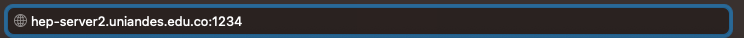

OJO: Este acceso solo estará disponible durante la escuela y dentro del campus de la universidad. Cualquier acceso externo será rechazado.

Aquí, 1234, deberá ser reemplazado por los keys que les han sido asignados durante este tutorial.  Además, se les solicitará una contraseña la cual también será brindada durante la sesión. 

En el caso que quieran acceder a estas herramientas para uso propio en sus computadores pueden obtenerlas usando el siguiente link https://launchpad.net/mg5amcnlo/lts/2.9.x/+download/MG5_aMC_v2.9.16.tar.gz para posteriormente descomprimirlo 

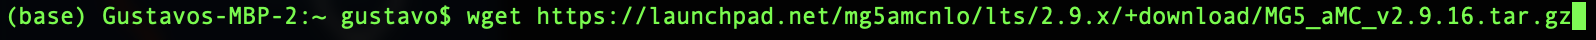

Para el caso de Pythia y Delphes, esa instalación la deben hacer desde la terminal propia de MadGraph que veremos más adelante.

Ya dentro de el host, veremos algo similar a esto

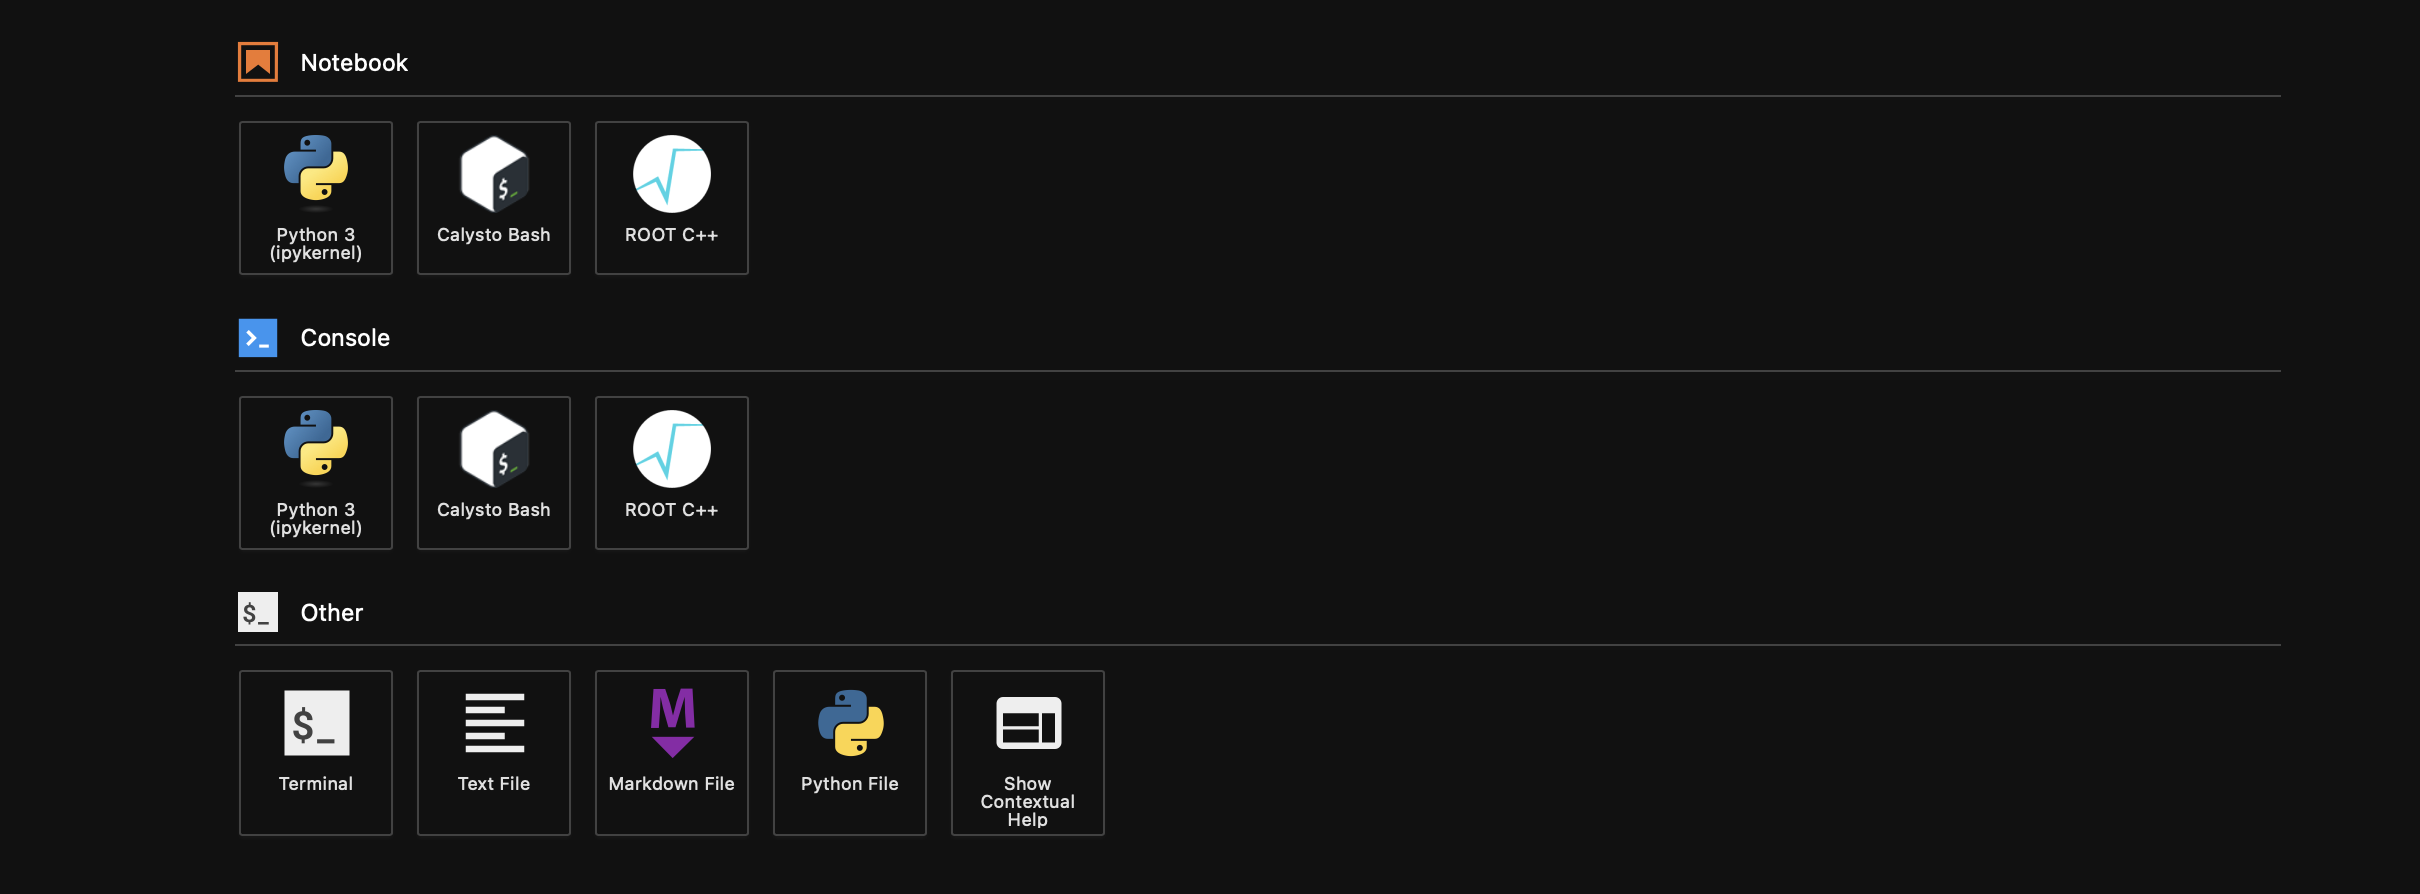

Aquí vamos a ingresar a  Other -> Terminal, esto nos abrirá una terminal dentro del docker para poder utilizar las herramientas. Con esto, podemos inicializar el software ejecutando

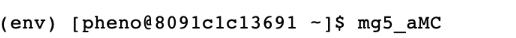

Esto nos mostrará algo como lo que se ve en la imagen, donde se nos indican los nombres de ciertas partículas. 

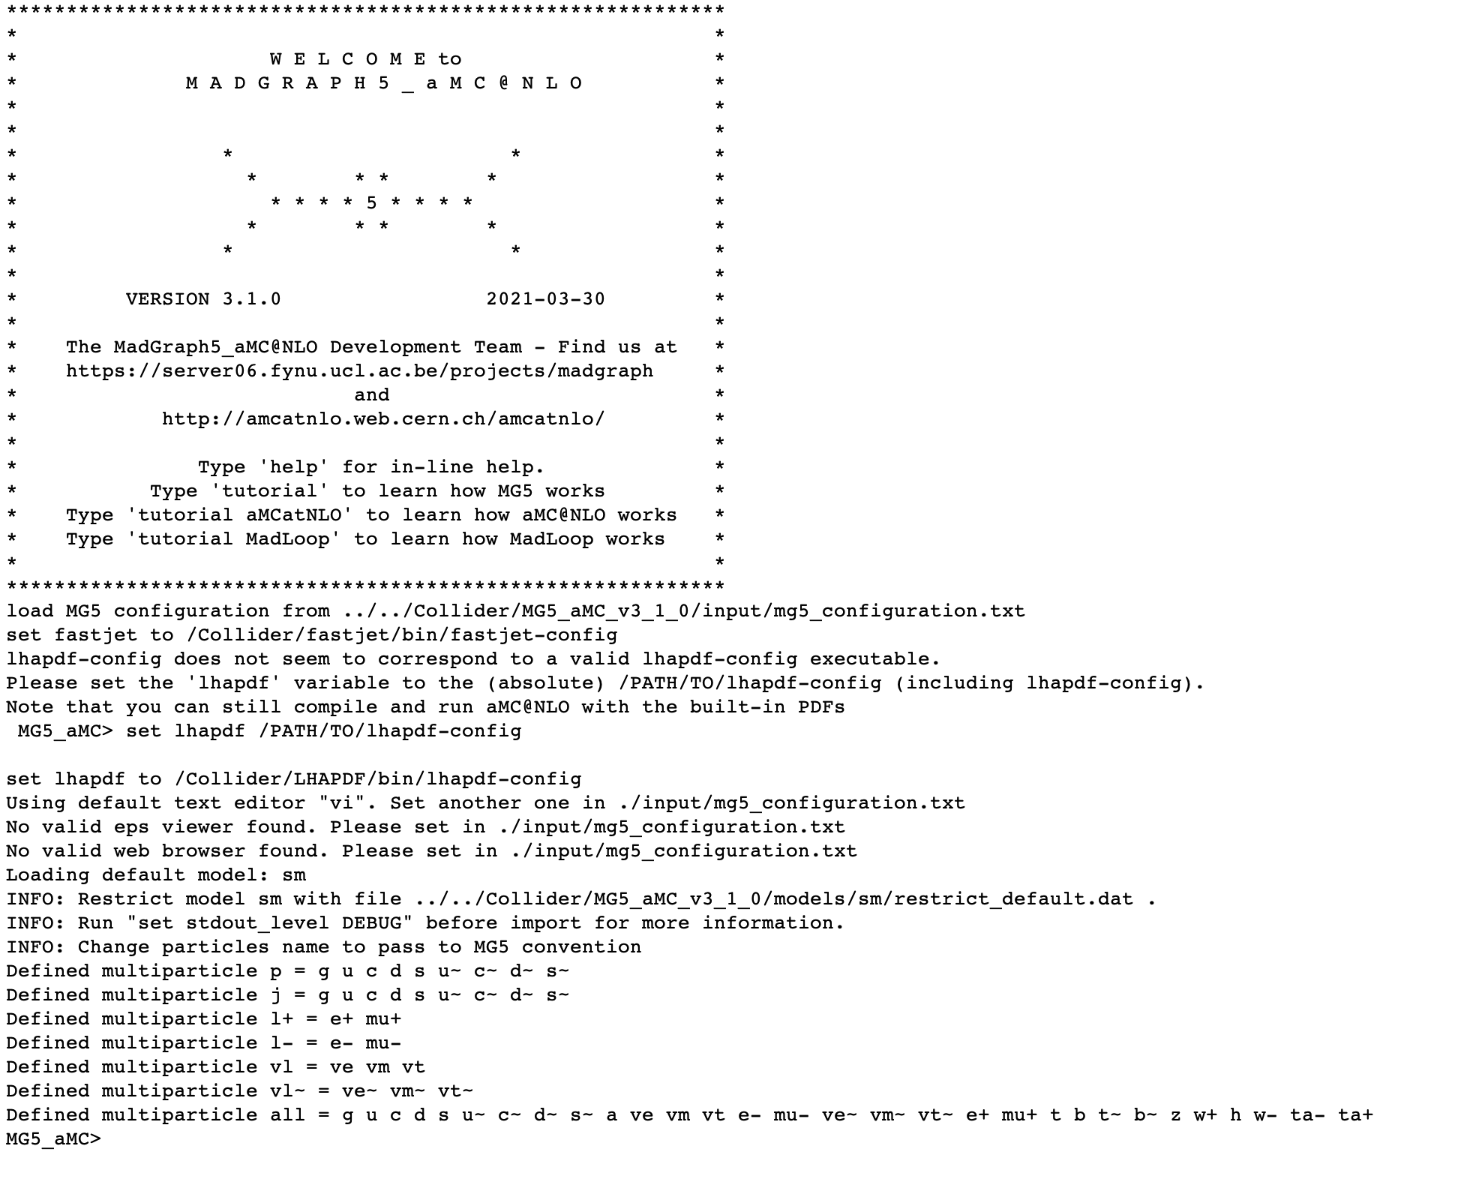

En caso de que se encuentren corriendo en computador propio, pueden ejecutar el comando mostrado en pantalla para obtener la misma terminal.

Con esto ya podemos empezar a realizar nuestras simulaciones en el docker donde todas las herramientas están disponibles con anterioridad. 



Para los que se encuentran trabajando en sus computadores propios, debemos instalar las herramientas complementarias. Estas son Pythia, Delphes y MadAnalysis.  Para ello, ejecutaremos los siguientes comandos (se requiere tener instalado root con anterioridad)

1. Pythia:

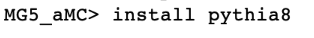

2. Delphes





3. MadAnalysis:



Esto tomará algunos minutos. Sin embargo, como estamos trabajando en el docker podemos empezar a simular. 

Para empezar realizaremos algunos procesos con el Modelo Estándar (SM) para comprender la sintaxis a utilizar. 

Por ejemplo, podemos empezar agregando al protón los quarks b. Esto lo hacemos escribiendo:

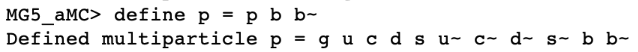

Y esto porqué? QCD nos indica que a altas energías, los quarks b del mar de Dirac pueden participar en ciertos procesos. 

Ahora si empecemos nuestro ejercicio, el cual se basa en tratar de reconstruir la masa del Z, dentro del SM.

En primer lugar, debemos indicarle a MadGraph que queremos generar un proceso, por ejemplo la colisión de dos protones a un par electrón positrón. Esto lo hacemos con 

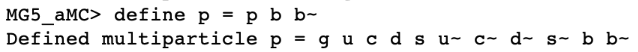



Demonos cuenta de dos cosas de esta sintaxis, tomamos dos protones, los cuales son representados por p p, y los enviamos a los estados finales usando un ">".

OJO: aquí los espacios son fundamentales. 

Cómo seguimos? Al haber generado el proceso inicial, para añadir mas procesos como la generación de dos muones usamos :

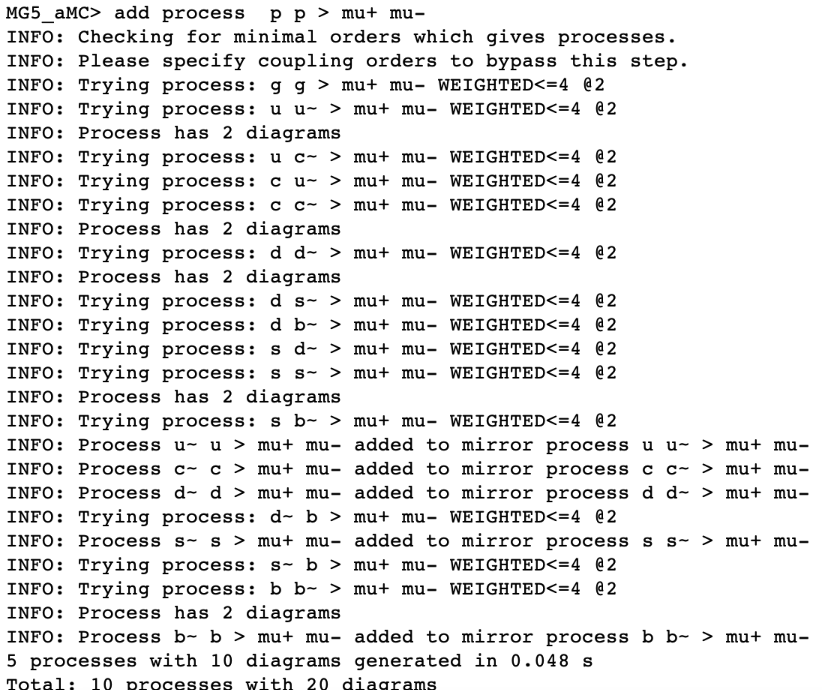


Podemos seguir! Por ejemplo para ahora generar dos taus:

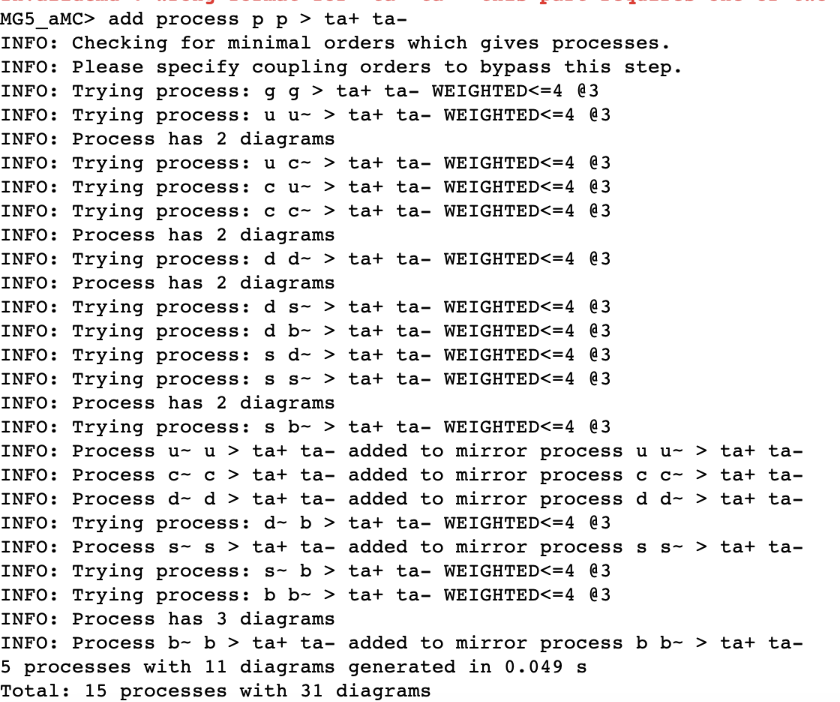

Aquí debemos resaltar una cosa, lo único que le hemos solicitado al software es que nos de los estados finales que le pedimos. Sin embargo, sabemos un par de cosas:

1. Podemos tener procesos de QCD aportando a la producción.
2. Existen dos tipos de procesos: On shell y Off-Shell.

Para restringir la aparición de procesos de QCD a nivel de arbol, debemos especificar que no queremos vértices de QCD. Esto lo logramos con:


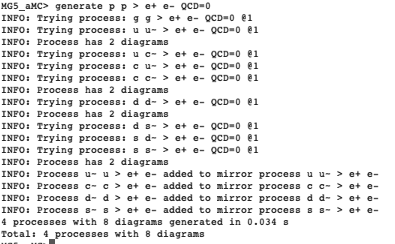

Cabe resaltar que esta misma opción se puede utilizar si queremos ignorar todos los procesos de QED. 

Así mismo, puede que queramos evitar que algunos mediadores aparezcan en nuestros diagramas. Por ejemplo, si queremos evitar el fotón como estado intermedio, introducimos el siguiente comando a nuestro generador o al add process

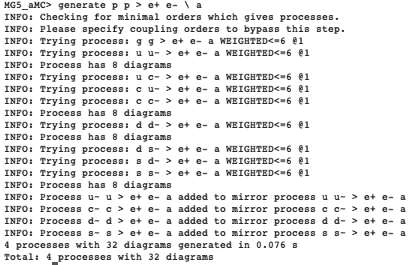

Por otro lado, como mencionamos anteriormente, procesos off shell y on shell contribuiran a los eventos que estamos buscando. 

La parte más sencilla yace con los procesos off shell, pues nuestra sintaxis ya la incluye. Es decir, nuestro comando " p p > Estados finales" incluye per se procesos off-shell. 
Para solo incluir procesos on shell, debemos especificar el proceso paso a paso como se muestra 

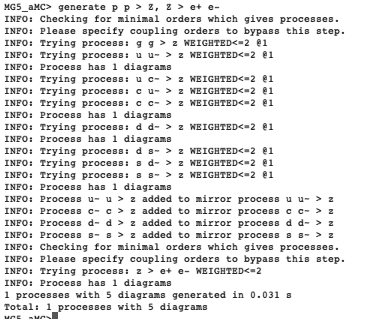




Bien, sabiendo todas estas cosas podemos pedirle a MadGraph información sobre la probabilidad de que algún proceso ocurra. Este observable fïsico se conoce como sección eficaz de producción o cross section. Fuera de generar los procesos, debemos especificar el nombre de la carpeta donde se guardarán todos los output, esto lo hacemos con el comando

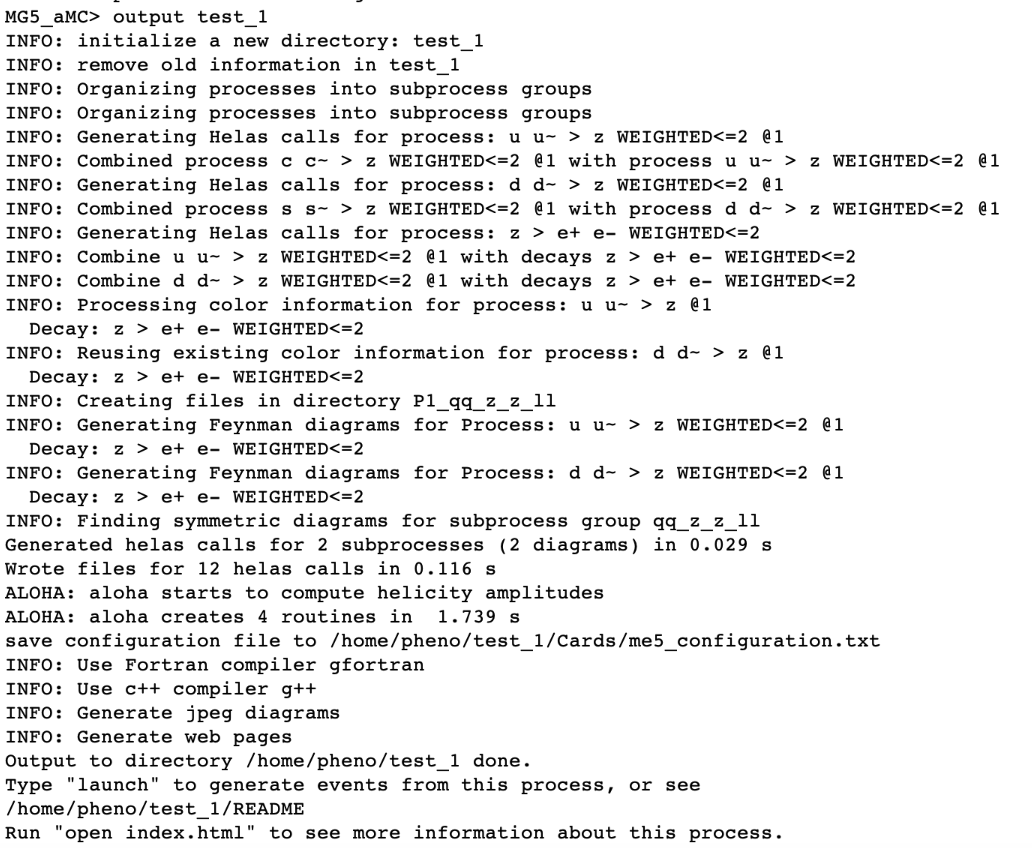

Esto nos generará una carpeta donde estará toda la información del sistema. Sin embargo, para generar toda la información de los procesos, debemos lanzar la simulación. Esto se hace con 

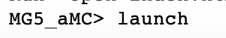

Realizar este launch nos arrojará las siguientes opciones para activar herramientas y modificar algunos datos. Como jugar con esto? Lo veremos más adelante.

1. Herremientas:

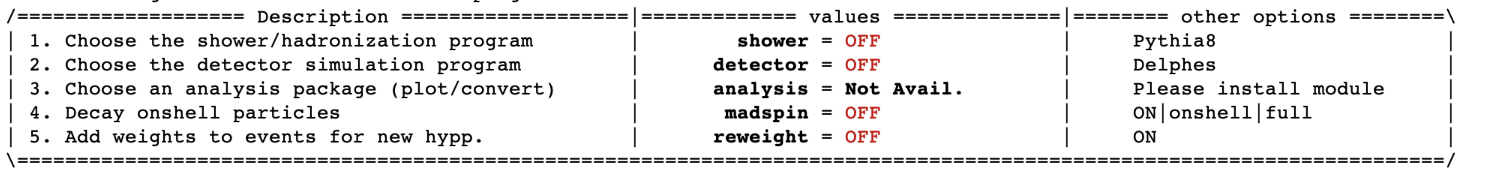

2. Tarjetas:

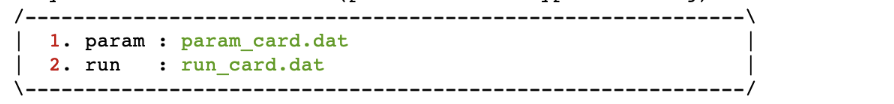


Para ver los datos de la sección eficaz, tenemos que ir a la carpeta que generamos al hacer el output. Dentro de esta veremos que existe un archivo html llamado "index.html". Este se ve de la siguiente manera

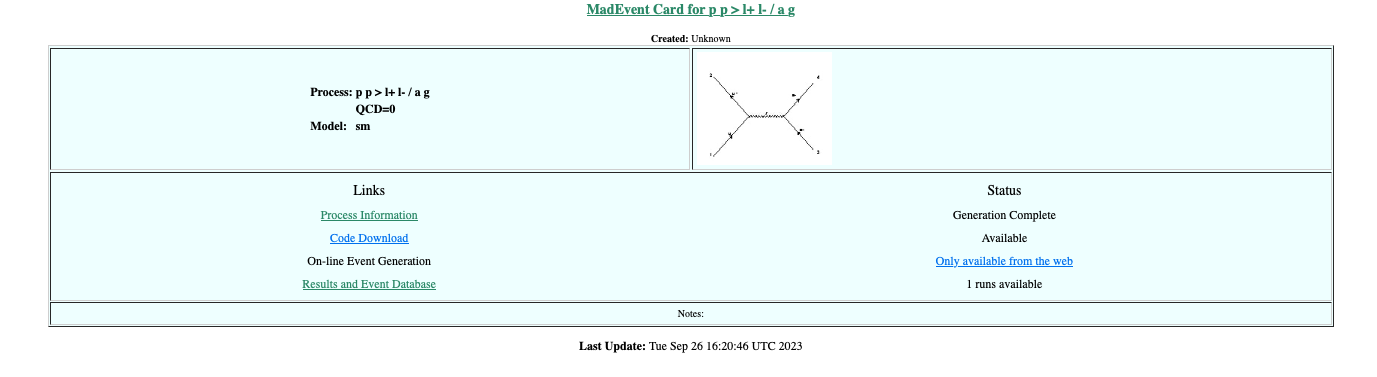

Lo primero que podemos acceder aquí son los diagramas de Feynman que aportaron a la sección eficaz, estos se verán guardados en el link Process Information. Al hacer click, se nos arrojará la siguiente pantalla

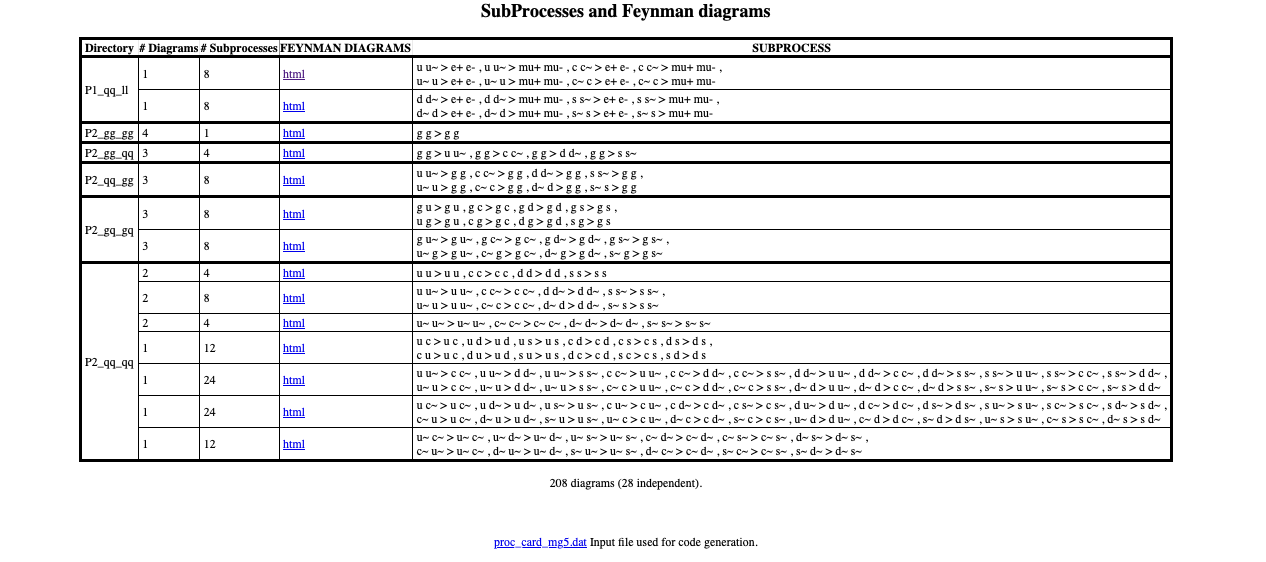

Aquí podemos ver una lista de todos los posibles subprocesos y los diagramas que se pueden ver explicitamente al hacer click sobre cualquiera de los html como se ve a continuación:

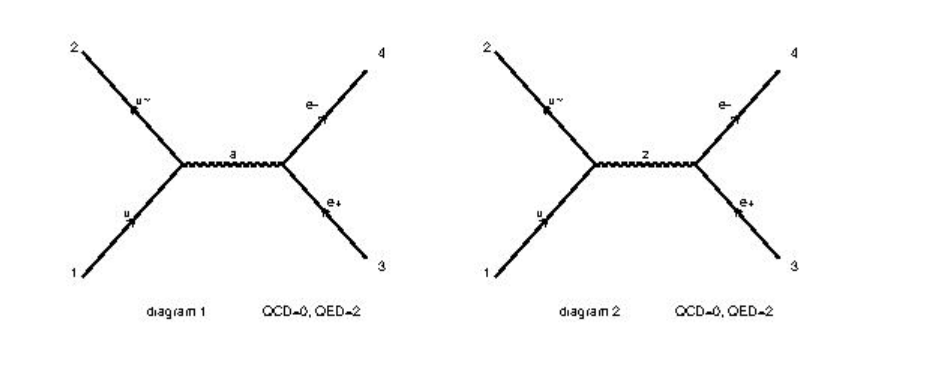


Sin embargo, la información que nos interesa es la sección eficaz, para encontrarla nos devolvemos a la página principal del html y hacemos click sobre Results and Event data base, aquí veremos la información fundamental de los procesos que hemos generado

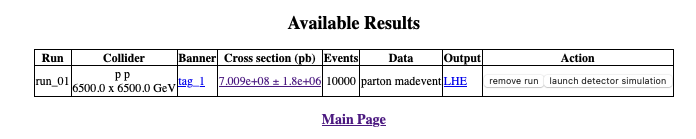

Ejercicio#1 (Sección eficaz de producción de l+ l- y j j ): 

Calcule la sección eficaz de producción del proceso protón protón a leptones, tomando únicamente el Z como mediador. Cómo se compara su resultado con lo obtenido en el caso de tener jets como estados finales?

Qué sigue? Pensemos en el dibujo del inicio. MadGraph produce todos los diagramas de Feynman a nivel partónico, es decir, nos entrega quarks y gluones libres como estados finales. Sin embargo, sabemos que el potencial de color es confinante, lo cual implica que estas partïculas deben hadronizar. Para ello requerimos el uso de una de las herramientas auxiliares conocida como Pythia. En palabras simples, la labor de Pythia es hadronizar las partículas que conocemos como jets a nivel de MadGraph y convertirlo en jets físicos. 

Para comprender como vamos a llegar hasta esto, sigamos el siguiente ejemplo:

EJEMPLO#2

Genere el proceso protón-protón a leptones y añada el proceso con jets como estados finales. Posterior al launch encender Pythia usando el comando mostrado en pantalla

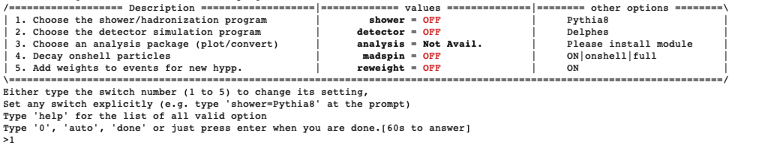


Esto tomará tiempo, pero nos arrojará dos numeros

1. La sección eficaz a nivel de MadGraph
2. El valor del matching
Con esto, podemos calcular la sección eficaz real a partir de :

$$\sigma_{real}=\sigma_{MG}\times e$$



Correr estos procesos va a tomar tiempo, alrededor de unos 15 minutos, pues MadGraph genera 10000 puntos por default para tener estadísticas precisas. En caso que queramos cambiar el número de eventos a producir, podemos (antes de hacer el output) cambiar el número de eventos accediendo, desde otra terminal, a la carpeta de los ouputs y luego a cards. Aquī vamos a editar usando vi un archivo con nombre "run_card.dat". Este archivo nos permitirá cambiar el número de eventos, la energía y demás como se muestra en pantalla.

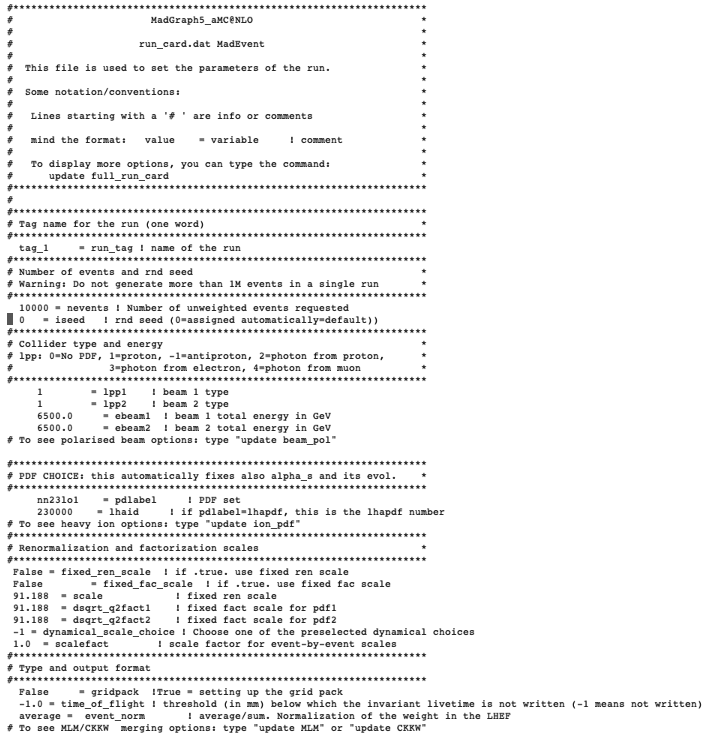

Como hemos visto, correr un proceso puede parecer tedioso en una primera aproximación. Sin embargo, podemos simplificar toda esta tarea por medio de un archivo de texto, el cual le dará a MadGraph las instrucciones de todo lo que queremos calcular. A estos archivos les daremos una extensión especial ".mg5". A continuación veremos un ejemplo de como crear uno de estos archivos a nivel de Pythia


EJEMPLO #3:

Desde consola genere un archivo de texto con extension ".mg5", usando el editor de texto vi dentro de la terminal,  en la cual va a incluir las opciones mostradas a continuación 

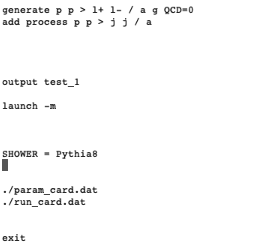

Donde en las dos últimas líneas agregamos la información correspondiente a las herramientas y tarjetas a utilizar. 

Sin embargo, lo que nos genera este mg5 está incompleto, pues al final lo que queremos es hacer las mediciones de estas partículas a nivel de detector. Para esto, debemos introducir una instrucción específica como se muestra

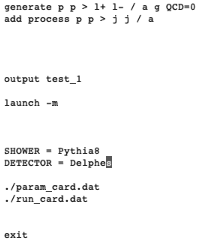